In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math

In [2]:
#读入数据
train_data=pd.read_csv('data/train.csv',header = 0)#训练集
val_data=pd.read_csv('data/val.csv',header = 0)#验证集
test_data=pd.read_csv('data/test_data.csv',header = 0)#测试集

#读取数据长度
Length_train_data=train_data.shape[0]
Length_test_data=test_data.shape[0]

#存储测试集label
train_data_label=train_data.iloc[:,-1]

#分开存放鸢尾花label为0、1、2的数据
data_for_label_0 = train_data.loc[train_data['label'] == 0,:]
data_for_label_1 = train_data.loc[train_data['label'] == 1,:]
data_for_label_2 = train_data.loc[train_data['label'] == 2,:]

$$D = \sqrt{(x - \mu)^T A^{T} \cdot A (x - \mu)}$$


In [3]:
#任务2距离改为马氏距离
#公式如上

def mahalanobisDistance(val_data,train_data,val_dot,train_dot,A):
    D=0
    xi=(train_data.loc[train_dot,['Sepal Length','Sepal Width','Petal Length','Petal Width']])
    xj=(val_data.loc[val_dot,['Sepal Length','Sepal Width','Petal Length','Petal Width']])
    D=np.dot(np.dot(np.dot(np.transpose(xi-xj),np.transpose(A)),A),(xi-xj))
    D=D**0.5
    return D

In [4]:
#按照实验报告中所述对A进行推导计算
def trainA(train_data,data_for_label_0,data_for_label_1,data_for_label_2):
    print("------------ start training A ------------")
    learning_rate=0.005#学习率
    times=15#学习过程中的迭代次数
    A=np.ones([2,4])#e为2，特征维度为4
    for time in range(times):
        #print(time)
        grad=np.zeros([4,4])
        for i in range(train_data.shape[0]):
            data=(train_data.loc[i,['Sepal Length','Sepal Width','Petal Length','Petal Width']])
            label=train_data['label'][i]
            d1=[] # 存储样本与各类别数据的马氏距离的平方
            d2=[] # 存储样本与各类别数据的欧氏距离的平方
            
            # 计算样本与label=0的数据之间的马氏距离和欧氏距离
            for j in range(len(data_for_label_0)):
                array_for_DV=np.array(range(1,5)).reshape(4,1)
                for a in range(4):
                    np.array(range(1,5)).reshape(4,1)
                    array_for_DV[a][0]=data[a]-data_for_label_0.iloc[j,a]#
                d2.append(np.dot(array_for_DV,np.transpose(array_for_DV)))
                d1.append(np.dot(np.transpose(np.dot(A,array_for_DV)),np.dot(A,array_for_DV))[0][0])
                
            # 计算样本与label=1的数据之间的马氏距离和欧氏距离
            for j in range(len(data_for_label_1)):
                array_for_DV=np.array(range(1,5)).reshape(4,1)
                for a in range(4):
                    array_for_DV[a][0]=(data[a]-data_for_label_1.iloc[j,a])
                d2.append(np.dot(array_for_DV,np.transpose(array_for_DV)))
                d1.append(np.dot(np.transpose(np.dot(A,array_for_DV)),np.dot(A,array_for_DV))[0][0]) 
            
            # 计算样本与label=2的数据之间的马氏距离和欧氏距离
            for j in range(len(data_for_label_2)):
                array_for_DV=np.array(range(1,5)).reshape(4,1)
                for a in range(4):
                    array_for_DV[a][0]=(data[a]-data_for_label_2.iloc[j,a])
                d2.append(np.dot(array_for_DV,np.transpose(array_for_DV)))
                d1.append(np.dot(np.transpose(np.dot(A,array_for_DV)),np.dot(A,array_for_DV))[0][0])
            
            #利用梯度下降法求解A
            sum_denominator=0 # softmax 分母部分
            for n in range(len(d1)):
                sum_denominator=sum_denominator+math.exp(-d1[n])
            sum1=np.zeros([4,4])  # 初始化梯度矩阵的第一部分和
            for n in range(len(d1)):
                if d1[n]!=0:
                    pik=math.exp(-d1[n])/sum_denominator # softmax
                    sum1=sum1+pik*d2[n]

            pi=0
            for n in range(len(d1)):
                if d1[n]!=0:
                    pik=math.exp(-d1[n])/sum_denominator
                    pi=sum1+pik
            sum1=sum1*pi
            ci_list=[]
            if label==0:
                ci_list=data_for_label_0
            elif label==1:
                ci_list=data_for_label_1
            d_ci=[]   
            dd_ci=[]
            for j in range(len(ci_list)):
                array_for_DV=np.array(range(1,5)).reshape(4,1)
                for a in range(4):
                    array_for_DV[a][0]=(data[a]-ci_list.iloc[j,a])
                dd_ci.append(np.dot(array_for_DV,np.transpose(array_for_DV)))
                B=np.dot(A,array_for_DV)
                B_trans=np.transpose(B)
                d_ci.append(np.dot(B_trans,B)[0][0])
            sum2=np.zeros([4,4]) # 初始化梯度矩阵的第二部分和
            for ac in range(len(d_ci)):
                if d_ci[ac]!=0:
                    pij=math.exp(-d_ci[ac])/sum_denominator
                    sum2=sum2+pij*dd_ci[ac]
            grad=grad+sum1-sum2  # 计算梯度
        A=A+learning_rate*2*np.dot(A,grad)  # 更新A
        print("epoch ["+str(time+1)+"/15]")
    return A

In [5]:
A=trainA(train_data,data_for_label_0,data_for_label_1,data_for_label_2)
print(A)

------------ start training A ------------
epoch [1/15]
epoch [2/15]
epoch [3/15]
epoch [4/15]
epoch [5/15]
epoch [6/15]
epoch [7/15]
epoch [8/15]
epoch [9/15]
epoch [10/15]
epoch [11/15]
epoch [12/15]
epoch [13/15]
epoch [14/15]
epoch [15/15]
[[0.91520147 1.74631304 1.83332099 1.00006676]
 [0.91520147 1.74631304 1.83332099 1.00006676]]


In [6]:
def predict(k,distance,train_data_label):
    dict_of_distance=dict(zip(distance,train_data_label))#字典
    order=sorted(dict_of_distance.items(),key=lambda x:x[0])#排序
    #前k小的距离
    temp=[]
    for i in range(k):
        temp.append(order[i][1])
    vote=[0,0,0]#不同标签的数目
    for i in range(k):
        vote[temp[i]]+=1
    result=vote.index(max(vote))#选择数目较多的类别作为最终类别
    return result

In [7]:
def best_k(train_data,val_data,train_data_label,A):
    result_k=[]#存放不同k值下的正确率
    max_k=25
    for k in range(1,max_k):
        counter_correct=0#分类正确的数目
        for j in range(val_data.shape[0]):#在验证集中验证（验证集有15个数据）
            label=val_data['label'][j]
            distance=[]#训练集中所有点到验证集第j个点的距离     
            for i in range(0,train_data.shape[0]):
                distance.append(mahalanobisDistance(val_data,train_data,j,i,A))#马氏距离
            result=predict(k,distance,train_data_label)    #预测类别     
            if label==result:
                counter_correct+=1
        result_k.append(counter_correct/val_data.shape[0])#计算k的正确率
        print("the accuracy for k="+str(k)+" is "+str(counter_correct/val_data.shape[0]))
    plt.plot(list(range(1,max_k)),result_k)
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('finding the best k')
    plt.show()#绘制不同的k对应的正确率

the accuracy for k=1 is 0.8666666666666667
the accuracy for k=2 is 0.9333333333333333
the accuracy for k=3 is 0.9333333333333333
the accuracy for k=4 is 0.9333333333333333
the accuracy for k=5 is 0.9333333333333333
the accuracy for k=6 is 0.9333333333333333
the accuracy for k=7 is 0.9333333333333333
the accuracy for k=8 is 0.9333333333333333
the accuracy for k=9 is 0.9333333333333333
the accuracy for k=10 is 0.9333333333333333
the accuracy for k=11 is 0.8666666666666667
the accuracy for k=12 is 0.9333333333333333
the accuracy for k=13 is 0.8666666666666667
the accuracy for k=14 is 0.8666666666666667
the accuracy for k=15 is 0.8666666666666667
the accuracy for k=16 is 0.9333333333333333
the accuracy for k=17 is 0.9333333333333333
the accuracy for k=18 is 0.9333333333333333
the accuracy for k=19 is 0.8666666666666667
the accuracy for k=20 is 0.8666666666666667
the accuracy for k=21 is 0.8666666666666667
the accuracy for k=22 is 0.8666666666666667
the accuracy for k=23 is 0.86666666666666

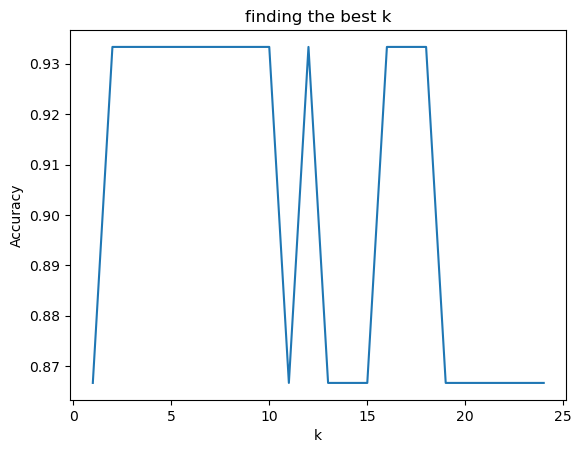

In [8]:
best_k(train_data,val_data,train_data_label,A)

In [11]:
result_test=[]
#经选取k=17
k=17
for j in range(0,Length_test_data):#测试集
    distance_test=[]#存储马氏距离
    for i in range(Length_train_data):#求解距离训练集中其他点的距离           
        distance_test.append(mahalanobisDistance(test_data,train_data,j,i,A))
    a=predict(k,distance_test,train_data_label)
    result_test.append(a)    
    
test_mahalanobis=pd.DataFrame(result_test, columns=['label'])

print("mahalanobis done")
test_mahalanobis.to_csv('mypredicsion_csv/task2_test_prediction.csv',index=0)
#用于可视化
test_euclidean_for_visual=pd.DataFrame(np.column_stack((test_data,result_test)),columns
    =['Sepal Length','Sepal Width','Petal Length','Petal Width','My prediction'])

test_euclidean_for_visual.to_csv('mypredicsion_csv/for visual/task2_test_prediction.csv',index=0)

mahalanobis done
